In [1]:
import pandas as pd
import pickle
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
BASE_DATASET = r"C:\Users\SHAIKH\OneDrive\Desktop\ML\ML\dataset"
FEATURES_PATH = os.path.join(BASE_DATASET, "extracted_permission.csv")
MODEL_DIR = r"C:\Users\SHAIKH\OneDrive\Desktop\ML\ML\models"

In [3]:
with open(os.path.join(MODEL_DIR, "apk_classifier.pkl"), "rb") as f:
    clf = pickle.load(f)


In [4]:
df = pd.read_csv(FEATURES_PATH)

In [5]:
# X = all permission columns
X = df.drop("label", axis=1)

# y = label column
y = df["label"]

In [6]:
# Predictions
y_pred = clf.predict(X)

In [7]:
# Metrics
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))


Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



In [8]:
y_pred = clf.predict(X)

Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



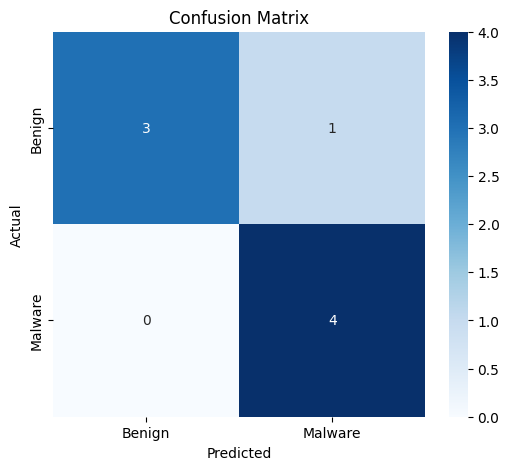

In [9]:
# Metrics
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

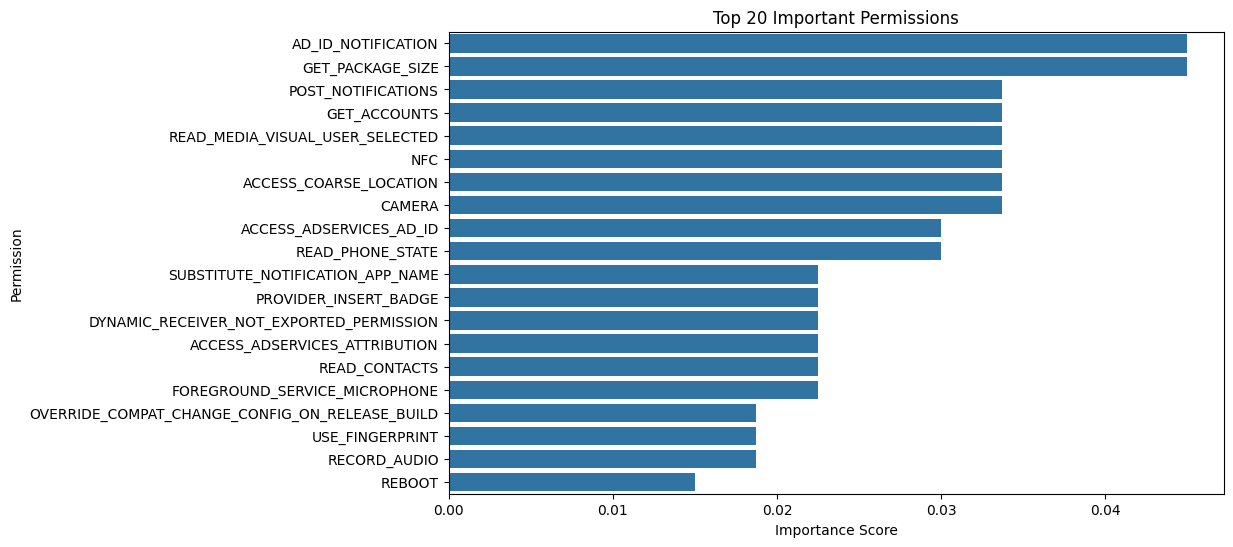

In [10]:
import numpy as np

# Get feature names (all columns except 'label')
feature_names = X.columns  

if hasattr(clf, "feature_importances_"):
    importances = clf.feature_importances_
    
    # Top 20 most important permissions
    indices = np.argsort(importances)[::-1][:20]

    plt.figure(figsize=(10,6))
    sns.barplot(x=importances[indices], y=feature_names[indices])
    plt.title("Top 20 Important Permissions")
    plt.xlabel("Importance Score")
    plt.ylabel("Permission")
    plt.show()
else:
    print("Model does not support feature_importances_.")
